In [12]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [13]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [14]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [15]:
ims = search_images_ddg('tesla car')
len(ims)

200

In [16]:
dest = 'images/tesla.jpg'
download_url(ims[0], dest, show_progress=False)

Path('images/tesla.jpg')

In [17]:
Path('images/tesla.jpg')

Path('images/tesla.jpg')

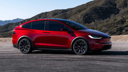

In [18]:
im = Image.open(dest)
im.to_thumb(128,128)

In [19]:
car_types = 'tesla','polestar','byd'
path = Path('cars')

In [20]:
if not path.exists():
    path.mkdir()
    for o in car_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} car')
        download_images(dest, urls=results)

In [21]:
fns = get_image_files(path)
fns

(#553) [Path('cars/byd/71b209dc-1408-4183-86d8-6a323722b990.jpg'),Path('cars/byd/1b44dda8-7c7f-4524-9ed3-3c103aa6af8a.jpg'),Path('cars/byd/3f3961fe-31d7-4789-9cf8-e5dcb262f121.jpeg'),Path('cars/byd/9d87f2f7-8d3b-492d-aa91-c7201fef8533.jpeg'),Path('cars/byd/962892fc-b383-48fd-afaf-94c43c93ee4b.jpg'),Path('cars/byd/dd89907b-2374-4340-8252-6dd012bb06a0.jfif'),Path('cars/byd/37127719-9768-4c36-b72e-d5144292296d.jpg'),Path('cars/byd/7c2a9ef1-40ae-4a72-b54c-8fb1c38bb839.jpg'),Path('cars/byd/4ca7639f-9cf8-4915-9afd-b6567de3af95.jpg'),Path('cars/byd/fb98b14e-3ee6-4cb3-9ad2-85566933c3ae.jpg'),Path('cars/byd/ccc35818-308c-45fa-a29a-b3e28c700d88.jpg'),Path('cars/byd/29932615-bdef-46b6-9e80-5afe255084b5.png'),Path('cars/byd/172f1f93-c7f5-43e6-85f9-66c66dddef01.jpg'),Path('cars/byd/b8021b06-2bb8-4689-9798-aff4df3d2035.jpg'),Path('cars/byd/e050d906-4f61-4681-a3cf-d4307f7d8bc3.jpeg'),Path('cars/byd/19a1d685-076f-43f8-bbd7-2a0f9a8b0d30.jpg'),Path('cars/byd/fc623e96-b6a3-4151-aafa-82a0764dd0d7.jpg'),Pa

In [29]:
failed = verify_images(fns)
failed

(#34) [Path('cars/byd/7c2a9ef1-40ae-4a72-b54c-8fb1c38bb839.jpg'),Path('cars/byd/19a1d685-076f-43f8-bbd7-2a0f9a8b0d30.jpg'),Path('cars/byd/188c0b86-4bea-40f2-9bca-a69b9a68996a.jpg'),Path('cars/byd/0258f9a3-fa0a-4655-b473-c33dfed7a4a3.jpeg'),Path('cars/byd/c8f27f68-72bf-4da4-bb81-701715647571.jpg'),Path('cars/byd/f0566e4e-216e-4198-9d17-22d30b536215.jpeg'),Path('cars/byd/14092970-a86b-4eb3-ba97-3f4334c18b4e.jpg'),Path('cars/byd/10f86509-140c-4157-93b6-28049c6764f3.jpg'),Path('cars/byd/0828269a-44fd-4dae-986a-1df76cb48e1f.jpg'),Path('cars/byd/1157b6a9-8e2d-4800-9efc-e797a3efa3ef.jpg'),Path('cars/byd/a6b7e06f-2c41-401a-9772-e247b07e3d56.jpeg'),Path('cars/byd/9cf73227-a38c-4631-b003-a201194b981a.jpg'),Path('cars/byd/e8446e51-436a-4175-8199-b7b9148bae34.jpg'),Path('cars/byd/f4bd2315-f8c5-4ce9-813b-04234b46cab6.jpg'),Path('cars/byd/95742930-2342-41c3-bdf8-a2c3cb27c41f.jpeg'),Path('cars/byd/5dfd3484-6867-4661-8c9a-cec1612069d0.webp'),Path('cars/polestar/6f824b56-e623-42c2-9cdd-0d2d60cacaf9.jpg

In [33]:
# Delete failed files and silently ignore missing files (if already deleted)
failed.map(lambda f: f.unlink(missing_ok=True))

(#34) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

## START TRAINING ##

In [377]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [378]:
dls = cars.dataloaders(path)

/home/nelson/miniforge3/envs/fast/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


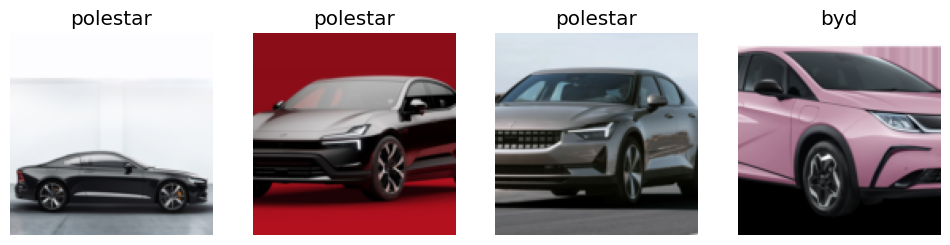

In [379]:
dls.valid.show_batch(max_n=4, nrows=1)

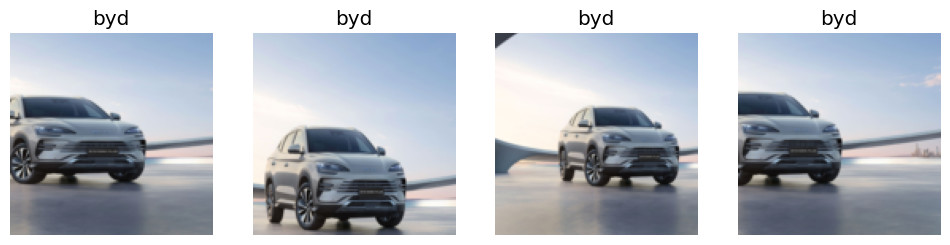

In [380]:
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

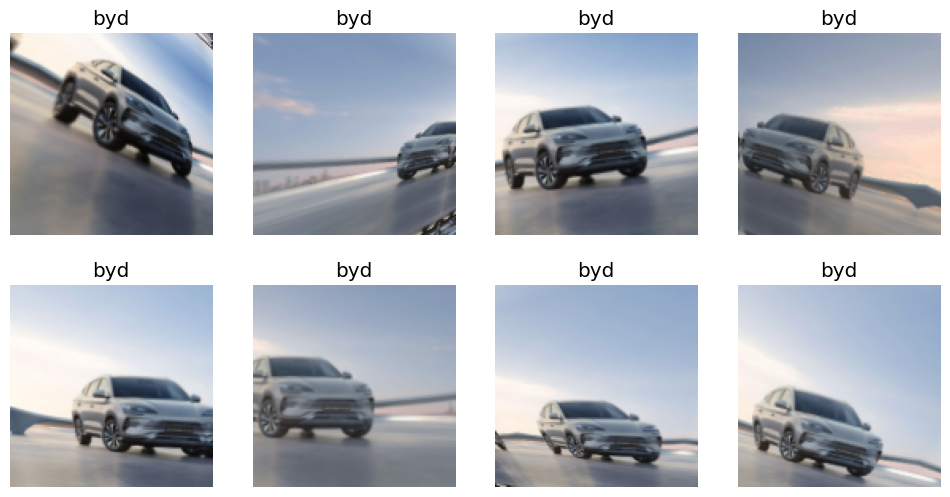

In [381]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [382]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cars.dataloaders(path)

In [383]:
### TRYING TO IDENTIFY ERROR MESSAGE WHEN 
torch.cuda.is_available()

False

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.954338,1.215312,0.506849,00:18


epoch,train_loss,valid_loss,error_rate,time
0,1.154936,0.642982,0.287671,00:22
1,0.989698,0.375494,0.136986,00:22


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [376]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## CLEANING COMPLETED

In [130]:
learn.export()

In [131]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [132]:
learn_inf = load_learner(path/'export.pkl')

In [133]:
learn_inf.predict('images/tesla.jpg')

('grizzly', TensorBase(1), TensorBase([7.5381e-05, 9.9986e-01, 6.8617e-05]))

In [134]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']